In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data, wb
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
import datetime
%matplotlib inline

/Users/StevenYu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We will use pandas_datareader to read the last 5 years data for the S&P 500 (S&P), NYSE, Dow Jones Industrial Average (DJIA), Nikkei 225 (Nikkei), Hang Seng, FTSE 100 (FTSE), DAX, All Ordinaries (AORD) indices.

In [2]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
SP500 = data.DataReader (name="^GSPC", data_source='yahoo', start=start, end=end)
NYSE = data.DataReader (name="^NYA", data_source='yahoo', start=start, end=end)
DAX = data.DataReader (name="^GDAXI", data_source='yahoo', start=start, end=end)
HSI = data.DataReader (name="^HSI", data_source='yahoo', start=start, end=end)
FTSE = data.DataReader (name="^FTSE", data_source='yahoo', start=start, end=end)
DJI = data.DataReader (name="^DJI", data_source='yahoo', start=start, end=end)
AORD = data.DataReader (name="^AORD", data_source='yahoo', start=start, end=end)
N225 = data.DataReader (name="^N225", data_source='yahoo', start=start, end=end)

Create a new dataframe to store the closing prices. Forward fill if there is gap existing.

In [5]:
closing_data = pd.DataFrame()
closing_data['SP500_close'] = SP500['Close']
closing_data['NYSE_close'] = NYSE['Close']
closing_data['DJI_close'] = DJI['Close']
closing_data['FTSE_close'] = FTSE['Close']
closing_data['DAX_close'] = DAX['Close']
closing_data['HSI_close'] = HSI['Close']
closing_data['AORD_close'] = AORD['Close']
closing_data['N225_close'] = N225['Close']

# There is NaN record, majorly due to bank holidays. And we need to fill in value for later analysis convenience.
# forward fill NaN data.
closing_data.fillna(method='ffill', inplace=True)
closing_data.fillna(method='bfill', inplace=True)

In [8]:
# Scale the value of each day by dividing with the max value of corresponding index. Add that column into the dataframe

closing_data['SP500_close_scaled'] = closing_data['SP500_close'] / max(closing_data['SP500_close'])
closing_data['NYSE_close_scaled'] = closing_data['NYSE_close'] / max(closing_data['NYSE_close'])
closing_data['DJI_close_scaled'] = closing_data['DJI_close'] / max(closing_data['DJI_close'])
closing_data['FTSE_close_scaled'] = closing_data['FTSE_close'] / max(closing_data['FTSE_close'])
closing_data['DAX_close_scaled'] = closing_data['DAX_close'] / max(closing_data['DAX_close'])
closing_data['HSI_close_scaled'] = closing_data['HSI_close'] / max(closing_data['HSI_close'])
closing_data['AORD_close_scaled'] = closing_data['AORD_close'] / max(closing_data['AORD_close'])
closing_data['N225_close_scaled'] = closing_data['N225_close'] / max(closing_data['N225_close'])

closing_data.head()

,SP500_close,NYSE_close,DAX_close,HSI_close,FTSE_close,DJI_close,AORD_close,N225_close,SP500_close_scaled,NYSE_close_scaled,DAX_close_scaled,HSI_close_scaled,FTSE_close_scaled,DJI_close_scaled,AORD_close_scaled,N225_close_scaled
Date,,,,,,,,,,,,,,,,
2011-01-03,1271.869995,8043.970215,6989.740234,23436.050781,5899.899902,11670.750000,4849.500000,10398.099609,0.596892,0.715677,0.564840,0.823973,0.830504,0.637314,0.814385,0.498279
2011-01-04,1270.199951,8022.180176,6975.350098,23668.480469,6013.899902,11691.179688,4849.500000,10398.099609,0.596108,0.713739,0.563677,0.832145,0.846551,0.638430,0.814385,0.498279
2011-01-05,1276.560059,8040.040039,6939.819824,23757.820312,6043.899902,11722.889648,4820.899902,10380.769531,0.599093,0.715328,0.560806,0.835286,0.850774,0.640162,0.809582,0.497448
2011-01-06,1273.849976,8000.899902,6981.390137,23786.300781,6019.500000,11697.309570,4831.100098,10529.759766,0.597821,0.711845,0.564165,0.836287,0.847340,0.638765,0.811295,0.504588
2011-01-07,1271.500000,7980.319824,6947.839844,23686.630859,5984.299805,11674.759766,4812.000000,10541.040039,0.596719,0.710014,0.561454,0.832783,0.842385,0.637533,0.808088,0.505129


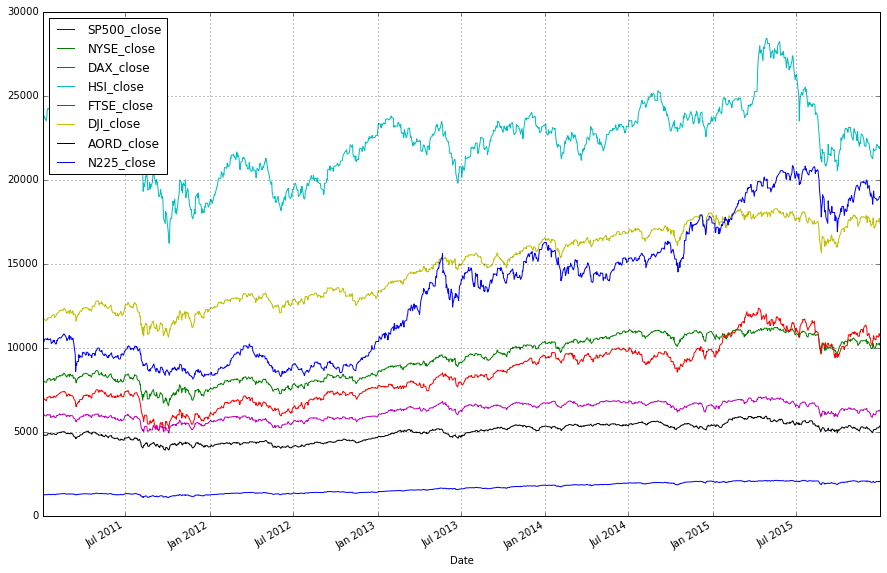

In [9]:
_ = pd.concat([closing_data['SP500_close'],
               closing_data['NYSE_close'], 
               closing_data['DAX_close'], 
               closing_data['HSI_close'],
               closing_data['FTSE_close'],
               closing_data['DJI_close'],
               closing_data['AORD_close'], 
               closing_data['N225_close']], axis=1).plot(grid=True,figsize=(15,10))

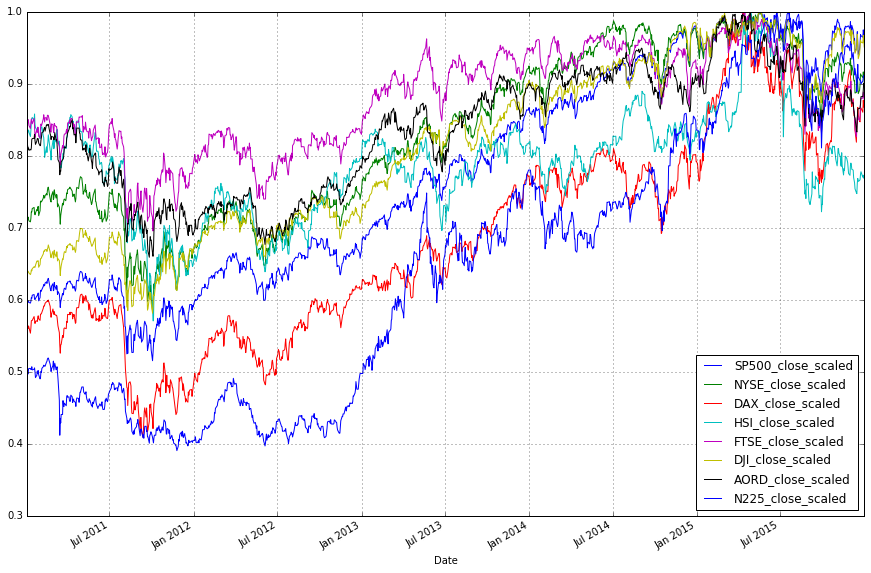

In [10]:
_ = pd.concat([closing_data['SP500_close_scaled'], 
               closing_data['NYSE_close_scaled'], 
               closing_data['DAX_close_scaled'], 
               closing_data['HSI_close_scaled'],
               closing_data['FTSE_close_scaled'],
               closing_data['DJI_close_scaled'],
               closing_data['AORD_close_scaled'], 
               closing_data['N225_close_scaled']], axis=1).plot(grid=True,figsize=(15,10))

Some correlation can be seen from the indices from the past 5 years. Next step, we will check the autocorrelation for each of the indices -- corelation between the index value and the latencys. Is yesterday's value predictive for the today's value ?

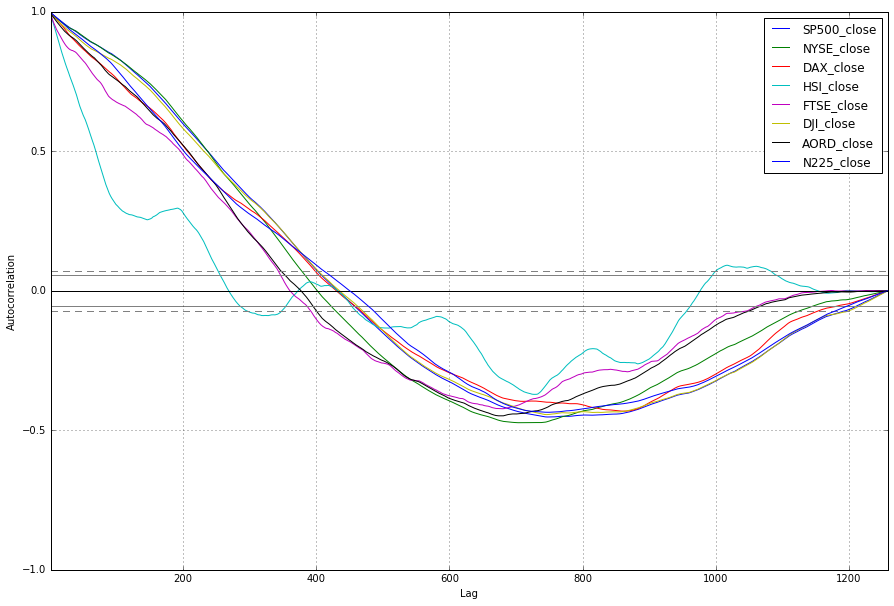

In [11]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)

_ = autocorrelation_plot(closing_data['SP500_close'], label = 'SP500_close')
_ = autocorrelation_plot(closing_data['NYSE_close'], label = 'NYSE_close')
_ = autocorrelation_plot(closing_data['DAX_close'], label = 'DAX_close')
_ = autocorrelation_plot(closing_data['HSI_close'], label = 'HSI_close')
_ = autocorrelation_plot(closing_data['FTSE_close'], label = 'FTSE_close')
_ = autocorrelation_plot(closing_data['DJI_close'], label = 'DJI_close')
_ = autocorrelation_plot(closing_data['AORD_close'], label = 'AORD_close')
_ = autocorrelation_plot(closing_data['N225_close'], label = 'N225_close')

plt.legend(loc='upper right')
plt.grid()

There is strong autocorrelation on the index latency. This matches the inuitive knowledge, rise of index value is likely to carry on, and vice visa.

Next step, we will construct scatter matrix -- corrlation between each two index value. This will tell us how well each two indexes are correlated.
To make it comparable between two indexes, we will use scaled value

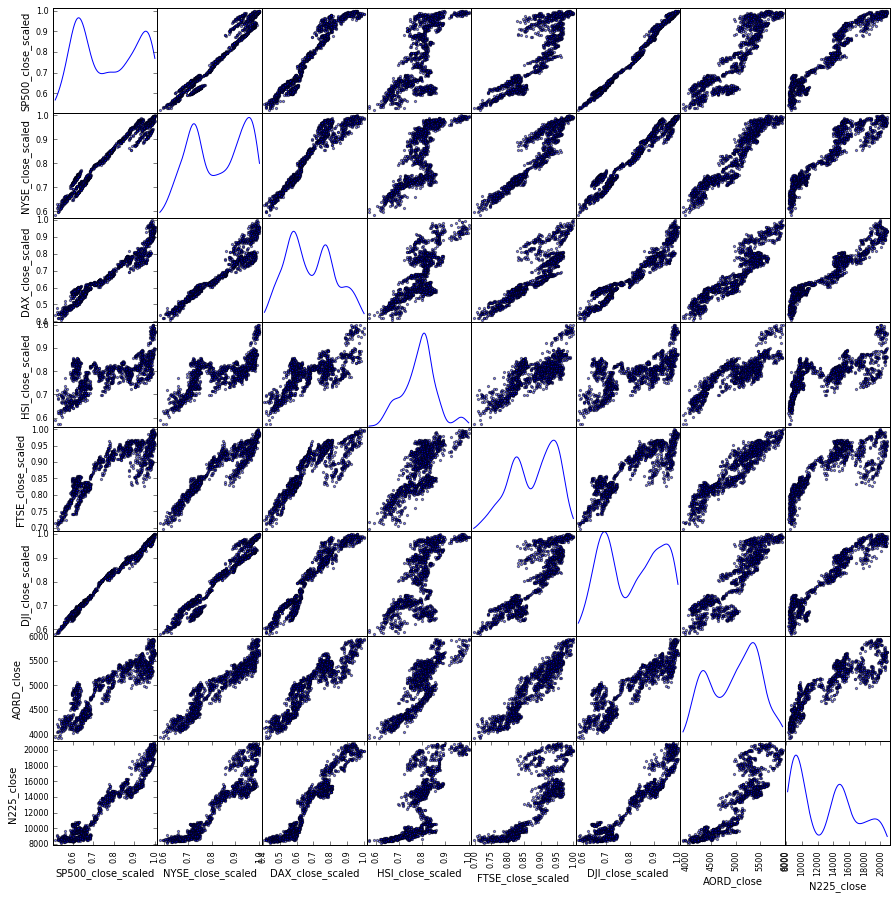

In [12]:
_ = scatter_matrix(pd.concat([closing_data['SP500_close_scaled'], 
                              closing_data['NYSE_close_scaled'], 
                              closing_data['DJI_close_scaled'],
                              closing_data['FTSE_close_scaled'],
                              closing_data['DAX_close_scaled'], 
                              closing_data['HSI_close_scaled'],
                              closing_data['AORD_close'],
                              closing_data['N225_close']], axis=1), figsize=(15, 15), diagonal='kde')

Significant correlation can be observed from the matrix, which supports the assumption that one market is influenced by another. 

Next step, we need to calculate the log return of each index.
This is a common practise in market anlysis, which requirs a stationary time series -- a stochastic process whose joint probability distribution does not change over time. Consequently, parameters such as mean, and variance do not change as time shifted. This is often achieved by looking at the difference between values rather than absolute value. In market analysis, the usual practice is to apply log returns -- ln( V(t) / V(t-1))

In [19]:
log_return_data = pd.DataFrame()

log_return_data['SP500_log_return'] = np.log(closing_data['SP500_close'] / closing_data['SP500_close'].shift())
log_return_data['NYSE_log_return'] = np.log(closing_data['NYSE_close'] / closing_data['NYSE_close'].shift())
log_return_data['DJI_log_return'] = np.log(closing_data['DJI_close'] / closing_data['DJI_close'].shift())
log_return_data['FTSE_log_return'] = np.log(closing_data['FTSE_close'] / closing_data['FTSE_close'].shift())
log_return_data['DAX_log_return'] = np.log(closing_data['DAX_close'] / closing_data['DAX_close'].shift())
log_return_data['HSI_log_return'] = np.log(closing_data['HSI_close'] / closing_data['HSI_close'].shift())
log_return_data['AORD_log_return'] = np.log(closing_data['AORD_close'] / closing_data['AORD_close'].shift())
log_return_data['N225_log_return'] = np.log(closing_data['N225_close'] / closing_data['N225_close'].shift())

log_return_data.describe()

,SP500_log_return,NYSE_log_return,DAX_log_return,HSI_log_return,FTSE_log_return,DJI_log_return,AORD_log_return,N225_log_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000377,0.000184,0.000342,-0.000053,0.000045,0.000319,0.000077,0.000481
std,0.009756,0.010057,0.013398,0.011846,0.009814,0.009100,0.009076,0.013708
min,-0.068958,-0.073116,-0.064195,-0.060183,-0.047798,-0.057061,-0.042998,-0.111534
25%,-0.004012,-0.004509,-0.006265,-0.005852,-0.004906,-0.003947,-0.004585,-0.006418
50%,0.000544,0.000468,0.000701,0.000000,0.000167,0.000443,0.000375,0.000153
75%,0.005264,0.005505,0.006863,0.005717,0.005336,0.005203,0.005238,0.008263
max,0.046317,0.051173,0.052104,0.055187,0.039433,0.041533,0.034368,0.074262


Now the mean, min, max are much more similar. 

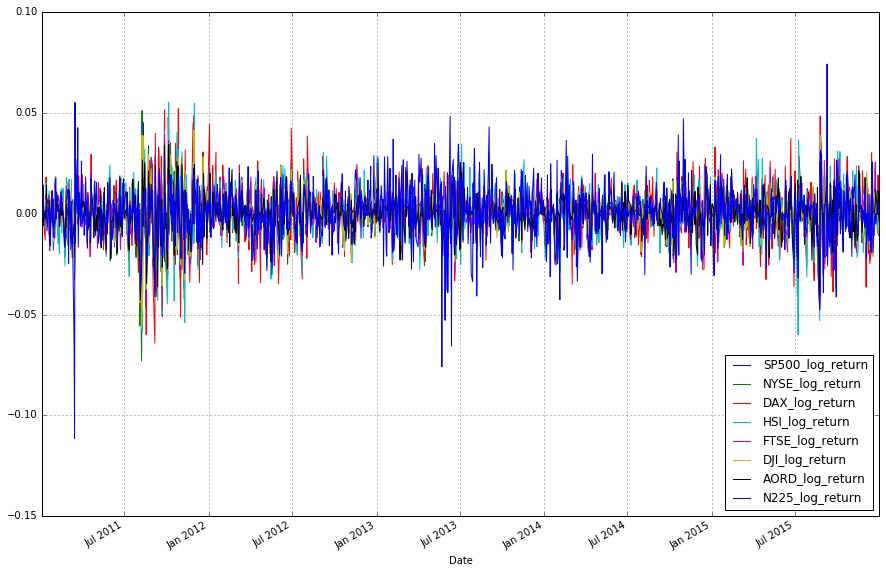

In [27]:
_ = pd.concat([log_return_data['SP500_log_return'],
               log_return_data['NYSE_log_return'],
               log_return_data['DAX_log_return'],
               log_return_data['HSI_log_return'],
               log_return_data['FTSE_log_return'],
               log_return_data['DJI_log_return'],
               log_return_data['AORD_log_return'],
               log_return_data['N225_log_return']], axis=1).plot(figsize=(15, 10))
plt.grid()
plt.legend(loc = 'lower right')

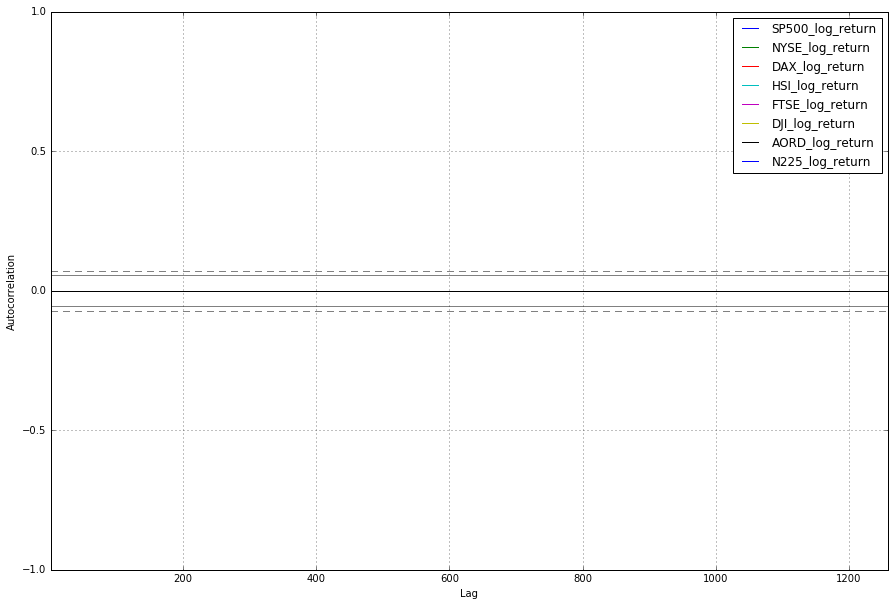

In [29]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)


_ = autocorrelation_plot(log_return_data['SP500_log_return'], label = 'SP500_log_return')
_ = autocorrelation_plot(log_return_data['NYSE_log_return'], label = 'NYSE_log_return')
_ = autocorrelation_plot(log_return_data['DAX_log_return'], label = 'DAX_log_return')
_ = autocorrelation_plot(log_return_data['HSI_log_return'], label = 'HSI_log_return')
_ = autocorrelation_plot(log_return_data['FTSE_log_return'], label = 'FTSE_log_return')
_ = autocorrelation_plot(log_return_data['DJI_log_return'], label = 'DJI_log_return')
_ = autocorrelation_plot(log_return_data['AORD_log_return'], label = 'AORD_log_return')
_ = autocorrelation_plot(log_return_data['N225_log_return'], label = 'N225_log_return')

plt.grid()

From the log-return graph we can tell that the indexes now are similarly scaled and centered with no trend moving visible. 

From the autocorrelations graph, there is no visible autocorrelation. This is good. Since individual financial market are Markov process, and knowledge of yesterday does not enable you to predict the future.  


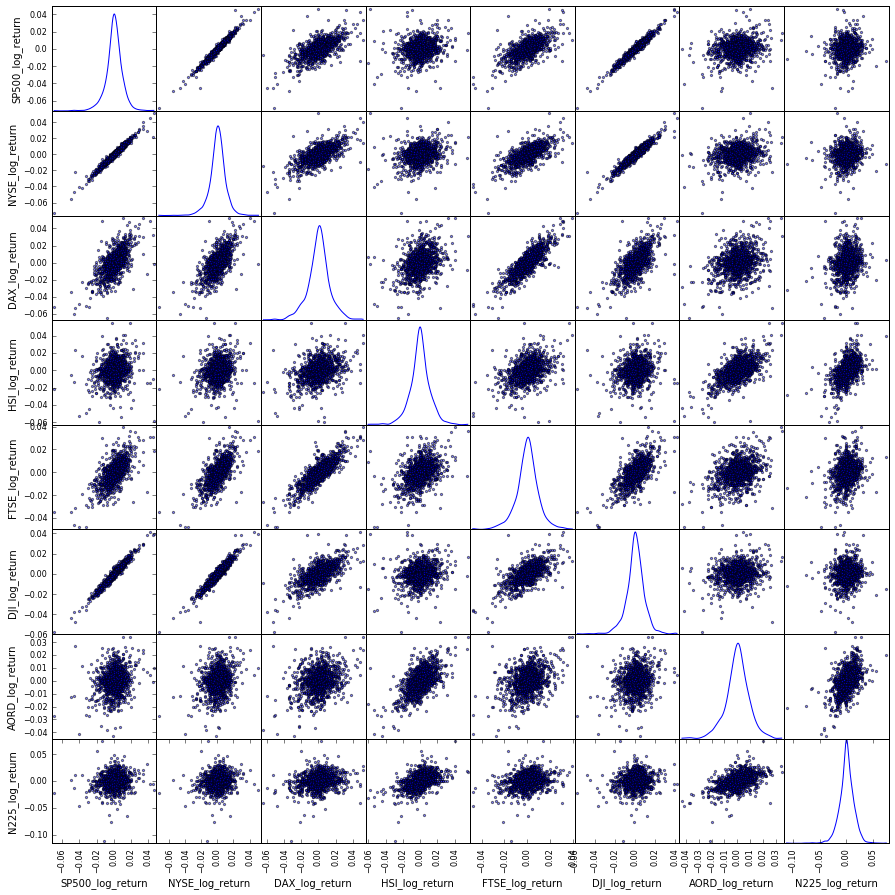

In [31]:
_ = scatter_matrix(log_return_data, figsize=(15,15), diagonal='kde')

The scatter matrix tells us more subtle and interesting result.
- The US indices are strongly correlated. This is as expected
- The other indices are less so, but there is structrue and signal. For example, FTSE have some degree of correlation with US indices. 

We can now move on to quantify the correlations, so as to choose the features for our learning model.
First, we will look at the how log returns for SP500 is correlated with other indices, closes available on the same day. We will assume the indices that close before the SP500 are available and the other US indices, which closes later,  are not.